# CBASS - Allen SDK demo

In this notebook, we apply CBASS on publicly available Neuropixel recordings from the **Allen Brain Observatory**. We invite the reader to visit the Allen SDK webpage for further instruction and documentation (https://allensdk.readthedocs.io/en/latest/index.html).

We will specifically use and download data from the **Visual Coding – Neuropixel** data set (https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html). Our script reuses parts of the demo scripts found there. Approximately 5.15GB of data will be downloaded locally on your computer. You will need to provide a path and make sure there is enough free space on your local drive. 

- This script is meant to run from the *../CBASS/python* folder on your local computer and **will not work** if your current directory is set elsewhere
- the script requires that the following module be installed:
    1. os
    2. numpy
    3. pandas
    4. matplotlib
    4. allensdk *<--- the python toolbox that allows to browse and download data from the Allen SDK*


In [23]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

The `EcephysProjectCache` is the main entry point to the Visual Coding Neuropixels dataset. It allows you to download data for individual recording sessions and view cross-session summary information.

In [24]:
# This path determines where downloaded data will be stored 
output_dir = 'D:\AllenBrainObservatory\cache'    #<------- EDIT TO YOUR LOCAL DATA DIRECTORY

In [26]:
# Create cache object - this allows to explore available data and manage local downloads
manifest_path = os.path.join(output_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


This dataset contains sessions in which two sets of stimuli were presented. The `"brain_observatory_1.1"` sessions are (almost exactly) the same as Visual Coding 2P sessions. We will focus on the `"brain_observatory_1.1"` sessions

In [27]:
# Select sessions in the brain_observatory_1.1 dataset
sessions = cache.get_session_table()
bo_ses = sessions[sessions["session_type"] == "brain_observatory_1.1"]

We have so far narrowed our search to 32 recording sessions. We will now focus on those containing recording from the *primary visual cortex __(V1)__* and from the *later geniculate nucleus __(dLGN)__*. Of all available session we will select the one that has the most extracellulary recorded units

In [28]:
# Of the session having v1 (VISp) and dLGN (LGd), retrieve the one having the most units
wanted_regions = ['VISp', 'LGd']
ses_sel = bo_ses[bo_ses["ecephys_structure_acronyms"].apply(lambda x: all(item in x for item in wanted_regions))]
best_ses = ses_sel.loc[ses_sel['unit_count'].idxmax()]

In [29]:
# Create a session object - it can be used to acess probes as well as unit and lfp data 
session_id = best_ses.name
print(session_id)
session = cache.get_session_data(session_id)

757216464


C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


We have identified a session of interest **757216464**. Like each session of the *Visual Coding - Neuropixel* dataset, it contains data from 6 neuropixel probes centered on the Visual Cortical Area. We will identify probes that contain data from **V1** (*VISp* in the list of structure acronyms used by the *Allen Institute*).

In [30]:
# List regions traversed by each probes
{session.probes.loc[probe_id].description : 
     list(session.channels[session.channels.probe_id == probe_id].ecephys_structure_acronym.unique())
     for probe_id in session.probes.index.values}

C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


{'probeA': [nan, 'MRN', 'MB', 'APN', 'NOT', 'DG', 'CA1', 'VISam'],
 'probeB': ['VIS', nan, 'Eth', 'TH', 'APN', 'DG', 'CA1'],
 'probeC': ['MGm', 'SGN', 'LP', 'DG', 'ProS', 'SUB', 'VISp', nan],
 'probeD': ['VISl', nan, 'TH', 'LGv', 'HPF', 'CA3', 'DG', 'CA1'],
 'probeE': [nan, 'PO', 'LP', 'LGd', 'HPF', 'CA3', 'DG', 'CA1', 'VISal'],
 'probeF': [nan, 'LP', 'DG', 'CA3', 'CA1', 'VISrl']}

Now that we've seen a general overview of how the probes are oriented and what structures they pass through, let's choose one and load its associated LFP data:

In [31]:
# Load LFP data form probeC - this may take a little while
probe_id = session.probes[session.probes.description == 'probeC'].index.values[0]
lfp = session.get_lfp(probe_id)

C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 

*CBASS* works by retrieving network events associated to power increase within a particular *frequency range* during a particular *state*. Here we will focus on events associated with increased power in the **gamma range (30-80Hz)** during **locomotion** specifically in **V1**. We will first visualize this change on a chunk of data.

In [32]:
# Select channels that are in V1 
chan = session.channels[session.channels['probe_id'] == probe_id]
channel_ids = chan[(chan.probe_id == probe_id) & \
                 (chan.ecephys_structure_acronym.isin(['VISp']))].index.values

# Select a chunck of lfp for plotting
time_win = [0, 400]
time_step = 14 * 180
time_lim = tuple(np.array(time_win) + time_step)

lfp_slice = lfp.sel(time=slice(*time_lim), channel=slice(np.min(channel_ids), np.max(channel_ids)))

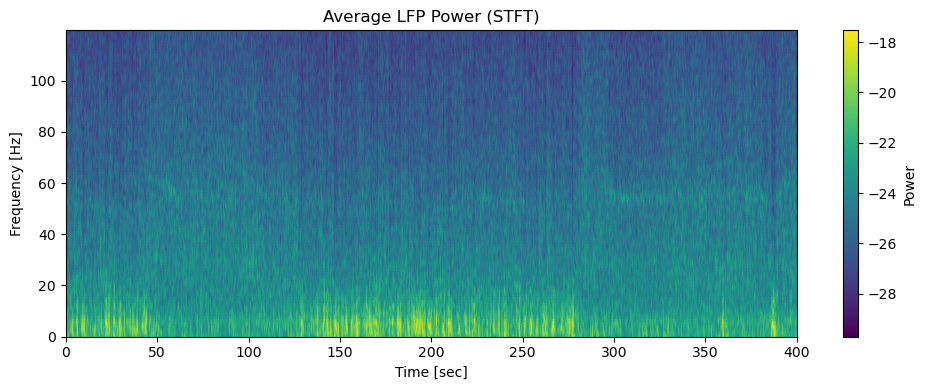

In [33]:
# Plot the short time Fourier transform of that time slice

from scipy.signal import stft

# STFT parameters
fs = np.round(1./np.diff(lfp_slice.time)[0])
nperseg = 1024

# Compute STFT for each channel and store power spectrograms
powers = []
for ch in lfp_slice.channel.values:
    trace = lfp_slice.sel(channel=ch).values
    _, t, Zxx = stft(trace, fs=fs, nperseg=nperseg)
    power = np.abs(Zxx) ** 2 # Power = magnitude squared
    powers.append(power)

# Stack power arrays: shape (n_channels, n_freqs, n_times)
powers = np.stack(powers, axis=0)

# Average across channels
avg_power = powers.mean(axis=0)  # shape: (n_freqs, n_times)

# Frequency vector is the same for all channels
f, _, _ = stft(lfp_slice.sel(channel=ch).values, fs=fs, nperseg=nperseg)

# Select frequencies under 120Hz
f_sel = f<=120

# Plot
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f[f_sel], np.log(avg_power[f_sel, :]), shading='gouraud')
plt.title('Average LFP Power (STFT)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Power')
plt.tight_layout()
plt.show()


In [34]:
# Extract the running speed
running_speed = session.running_speed
print(running_speed.shape)

C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(366504, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

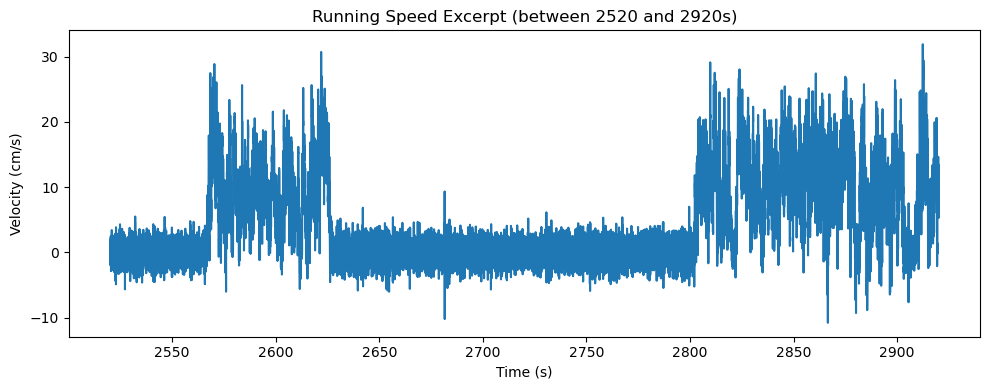

In [35]:
#Plot running speed on the time chunck used previously
excerpt = running_speed[running_speed['start_time'].between(*time_lim)]

plt.figure(figsize=(10,4))
plt.plot(excerpt['start_time'], excerpt['velocity'])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.title(f'Running Speed Excerpt (between {time_lim[0]} and {time_lim[1]}s)')
plt.tight_layout()
plt.show

As can be seen on these plots **locomotion** coincideds with increased power in the **gamma range (30-80Hz)** and more particulary within a narrower band around 55Hz. Conversely quiescence is linked to increased low frequency activity (1-10Hz). We will now apply *CBASS* to retrieve network events associated with that increased activity. But first we need to format the lfp 

In [36]:
# We will first have to retrieve locomotion onset and offset
from Pipeline.Utilities.CBASS_U_ChangePoint import CBASS_U_ChangePoint as change_point

# The sample frequency of running speed is uneven. We will estimate the average
speed_sf = round(1/np.mean(np.diff(running_speed['start_time'])))

# Define the minimum length for quiescence at 4s. Shorter quiescence epochs will be lumped with adjascent running epochs
win = 4  * speed_sf

# Detect change point
run_on_idx, run_off_idx = change_point(running_speed['velocity'], win)
print(f"there is {len(run_on_idx)} running epochs")

# Get the time stamps of the changes
run_on_ts = running_speed.loc[run_on_idx, 'start_time'].to_numpy()
run_off_ts = running_speed.loc[run_off_idx, 'start_time'].to_numpy()

there is 130 running epochs


In [37]:
# We will index locomotion onset and offset for each lfp samples
t = lfp.time.values
is_running = np.zeros((lfp.shape[0]), dtype=bool)
for on, off in zip(run_on_ts, run_off_ts):
    is_running = is_running | ((t > on) & (t < off))

print(t.shape)

(12035648,)


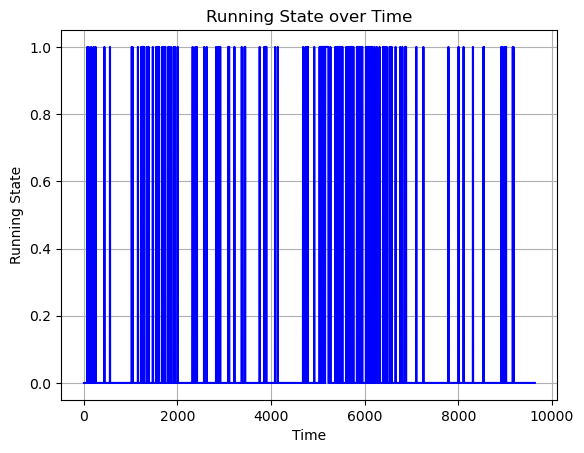

In [38]:
# Plot the boolean values (1 for True, 0 for False)
plt.plot(t, is_running, color='b', linestyle='-')

# Label the axes and add a title
plt.xlabel('Time')
plt.ylabel('Running State')
plt.title('Running State over Time')

# Add a grid 
plt.grid(True)

# Show the plot
plt.show()


In [39]:
# Select the chunk of lfp that is in v1 and format it as a channel x time np.array
lfp_v1 = lfp.sel(channel=slice(np.min(channel_ids), np.max(channel_ids))).values.transpose()

*CBASS* requires about 3 times the size of `lfp_v1` in **working memory** to run. We recommend checking that there is enough available on your system. If not we will delete `lfp` and `running speed` as they are not required anymore.

In [40]:
print(f"lfp memory usage: {lfp.nbytes / 1e6:.2f} MB")
print(f"running_speed memory usage: {running_speed.memory_usage(deep=True).sum() / 1e6:.2f} MB")
print(f"lfp_v1 memory usage: {lfp_v1.nbytes / 1e6:.2f} MB")
print(f"is_running memory usage: {is_running.nbytes / 1e6:.2f} MB")

lfp memory usage: 4477.26 MB
running_speed memory usage: 8.80 MB
lfp_v1 memory usage: 1155.42 MB
is_running memory usage: 12.04 MB


In [41]:
# OPTIONAL - delete lfp and running_speed to make space 
del lfp, running_speed
import gc
gc.collect()

24137

We now have formated a array of lfp recordings across v1: `lfp_v1` and a boolean indexing locomotion: `is_running`. We have also computed the sampling rate of the lfp: `fs`. We have also made sure that we have enought working memory to work with. We will now apply *CBASS*to identify network events associated to an increase in power in the gamma band [30-80Hz].

In [42]:
# Appy CBASS
from Pipeline.CBASS_Main_DetectEvents import Main_DetectEvents

# Sets CBASS parameter defining the inner working of the method
class sOPTION:
    pass
sOPTION.blVerbose=True # Sets whether to print progress on the screen. Default is true 
sOPTION.dbSigThrs=0.0001 # Significance threshold for enriched regions
sOPTION.inNClu = 20 # 20 # Number of clusters used in partitionning
sOPTION.ClusterMETHOD = 'Kmeans' # 'Kmeans'
sOPTION.TransformMETHOD = 'hilbert' # 'hilbert'
sOPTION.FilterMETHOD = 'filtfilt' #  'lfilter' for 1D filter, 'filtfilt' for two passes on the signal (foward and backward) and phase zero.
sOPTION.chDataFormat = 'complex' # Format of hilbert transform coordinates ('polar' or 'complex' Default is 'complex')
sOPTION.inRefChan = np.round(lfp_v1.shape[0] / 3).astype(int)   # Reference channel (we will set close to the midle of the range).

# Optional labelling parameters
sOPTION.cBAND_LABEL = ['Gamma']  # character array or cell array of labels  for bands in cBAND (i.e. {'Beta', 'Gamma'})
sOPTION.cSTATE_LBL  = ['Running']  # character array or cell array of labels  for states in cSTATE (i.e. {'Stim', 'Running'})

# Non optional function arguments defining the band and state of interest
cBAND = np.array([[30,80]]) # Gamma
cSTATE = np.array([[is_running]])

# print(sOPTION.inRefChan)
# type(sOPTION.inRefChan)

# Calls main function 
sFREQ_BAND, cTROUGH, cTRGH_RND = Main_DetectEvents(lfp_v1, fs, cBAND, cSTATE, sOPTION);

sOPTION.cBASELINE is not valid. Setting to default
---->> Compute phase randomized signal ... 
-- PCA: 3.4308598041534424s seconds ---
-- FFT: 87.06360578536987s seconds ---
-- IFFT: 368.2123463153839s seconds ---
-- Randomize1D: 514.2023787498474s seconds ---
---->> Total processing time: 529.7428331375122s seconds ---
Done formatting the LFP and computing the phase randomized signal 


------ Gamma ---------------------------

---->> Extract hilbert troughs ... 

---- Real signal ... 
Using  filtfilt
--Time for fitering: 28.576441764831543
Using  hilbert
--Time for transformation: 152.49014496803284
---- Total processing time: 182.89529180526733s seconds ---

---- Surrogate signal ... 
Using  filtfilt
--Time for fitering: 20.124707460403442
Using  hilbert
--Time for transformation: 79.15043139457703
---- Total processing time: 101.2753517627716s seconds ---

Done with extraction 

---->> Partition troughs ... 

---- Real signal ... 
Optimization terminated successfully.
         Curr

C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\CBASS\python\Pipeline\Utilities\CBASS_U_ScoreThreshold.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  db_MDNorm   = -db_MahalD / np.sqrt(1/np.sum(bl1TSelIdx) + 1/np.sum(~bl1TSelIdx))
C:\ProgramData\Miniconda3\envs\lab_env\Lib\site-packages\scipy\optimize\_optimize.py:863: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
D:\CBASS\python\Pipeline\Utilities\CBASS_U_ScoreThreshold.py:54: RuntimeWarning: Maximum number of iterations has been exceeded.
  dbThreshold = fmin(MDNORM, np.median(db1Score), maxiter=50, disp=sOPTION.blVerbose)


---- Total processing time: 521.612875699997s seconds ---

------ Done processing Gamma ----------------

Score: 		 SIGNIFICANT 	(p = 0.0, KS Test - real vs surrogate data)
Partition: 	 SIGNIFICANT 	(p = 0.0, Fraction of surrogate troughs above threshold)



We have now ran *CBASS* succesfully. As one can see the event selection is highly significantly associated with locomotion if compared to a selection obtained on randomized data. Let's now retrieve the indices of events and examine the average field around gamma events.

In [43]:
# Compute the event triggered average of the LFP around gamma events

# Retrieve event indices
trough = sFREQ_BAND[0].in1TroughIdx #<--- trough of filtered signal in the referance channel
score = sFREQ_BAND[0].db1Score.ravel() #<--- score of the each trough quantifying the association with locomotion
threshold = sFREQ_BAND[0].dbThreshold #<--- threshold above which events are retained
event_idx = trough[score > threshold]

# Select a window of about 20ms around events
win = [-0.06, 0.06]

# Stack index vertically
rel_idx = np.arange(round(win[0] * fs), round(win[1] * fs), 1) # relative indices
event_sel = event_idx[(event_idx > -rel_idx[0]) & (event_idx < (lfp_v1.shape[1] - rel_idx[-1] - 1))] # indices
eta_idx = rel_idx[None, :] + event_sel[:, None]

# Collects the average LFP around gamma events in each even channel (adjascent channels tend to osciallate out of phase)
eta = []
for chan in range(lfp_v1.shape[0]):
    if (chan % 2) == 0:
        lfp_chan = lfp_v1[chan, :]
        lfp_chan = lfp_chan - np.mean(lfp_chan)
        eta.append(np.mean(lfp_chan[eta_idx], axis=0))
eta = np.stack(eta, axis=0)

# Detrend the eta channel by chanel
eta_trend = []
for chan in range(eta.shape[0]):
    eta_trend.append(np.linspace(eta[chan, 0], eta[chan, -1], eta.shape[1]))
eta_trend = np.stack(eta_trend, axis=0)
eta = eta - eta_trend

# Calculate the CSD of the eta
csd = np.diff(eta, 2, axis=0)

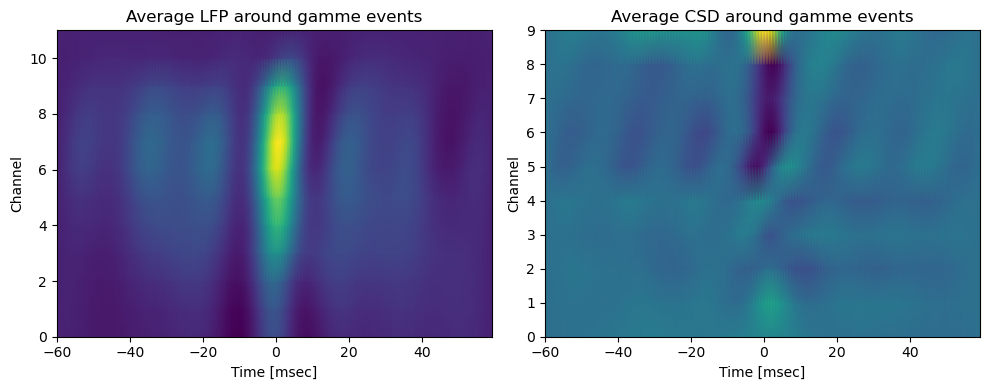

In [44]:
# Plot ETA and CSDS

# Initialize figure
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # axs is a list (or array) of Axes

# Set variables and titles
plot_vars = [eta, csd]
var_titles = ['LFP', 'CSD']

# Loop over variable
for idx in range(len(plot_vars)):
    # Retrieve variable
    plot_var = plot_vars[idx]
    var_title = var_titles[idx]
    
    # Interpolate the ETA
    from scipy.interpolate import interp1d
    x = np.arange(plot_var.shape[0])  # e.g., [0, 1, 2, 3]
    x_new = np.linspace(0, plot_var.shape[0] - 1, plot_var.shape[0] * 5)
    f = interp1d(x, plot_var, axis=0)
    eta_interp = f(x_new)
    
    # Set axes
    t = 1000 * rel_idx / fs
    chan = [chan for chan in range(plot_var.shape[0])]
    
    # plot the CSD
    axs[idx].pcolormesh(t, chan, -plot_var, shading='gouraud')
    axs[idx].set_title(f"Average {var_title} around gamme events")
    axs[idx].set_ylabel('Channel')
    axs[idx].set_xlabel('Time [msec]')
    
plt.tight_layout()
plt.show()